In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import linearmodels.iv.model as lm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

## Load diabetes dataset

In [2]:
diabetes_data = load_diabetes(as_frame=True, scaled = False)
print(diabetes_data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
diabetes_df = diabetes_data["frame"]
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


## i) Data Pre-processing and Exploratory data analysis

- Checking for any missing or NA values

In [4]:
# Check for missing values (NaN)
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [5]:
# Check for missing values (NaN)
diabetes_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [6]:
# Check if there are any missing values in the DataFrame
diabetes_df.isna().any().any()

False

- Exploratory Data Analysis

In [7]:
# Summary Statistics
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


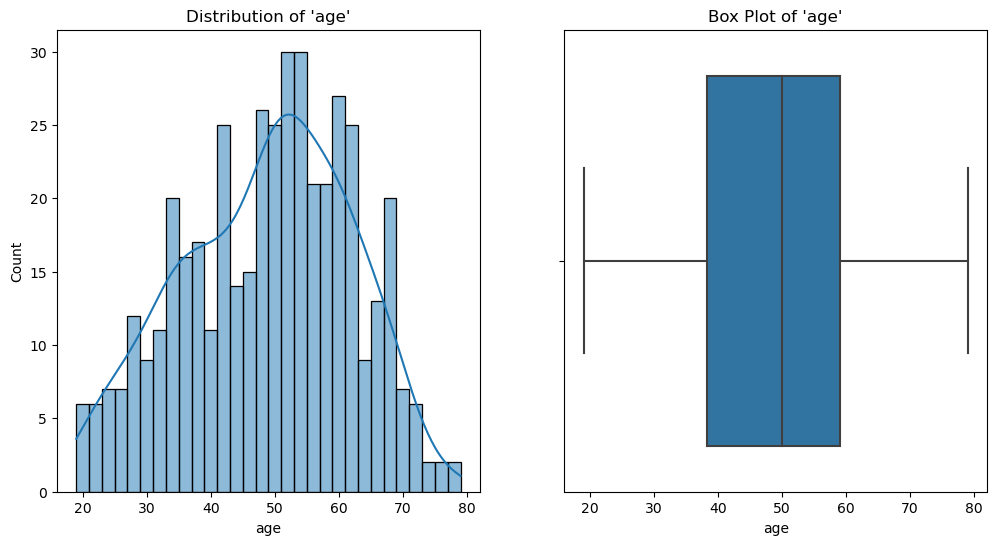

Kurtosis of 'age': -0.6771986900987494


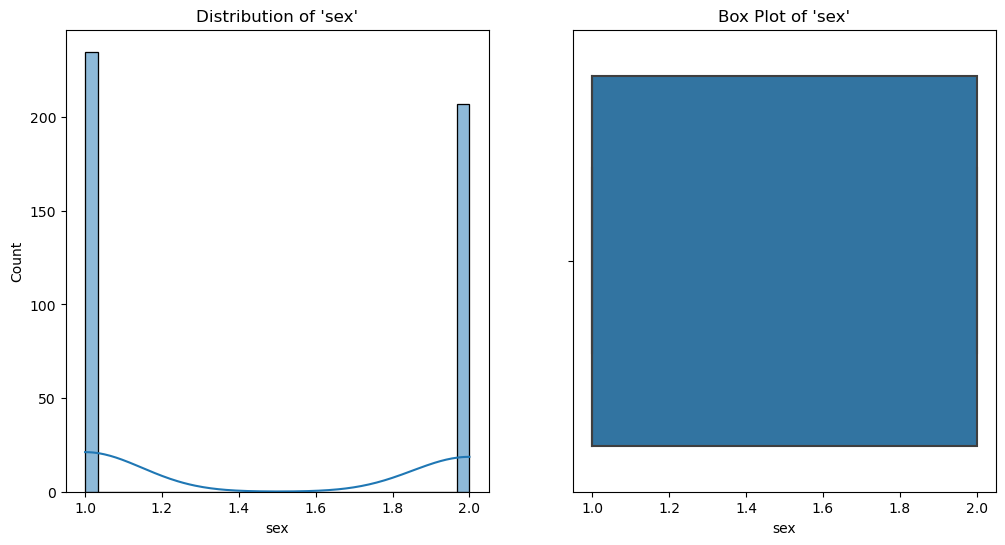

Kurtosis of 'sex': -1.9838832356871214


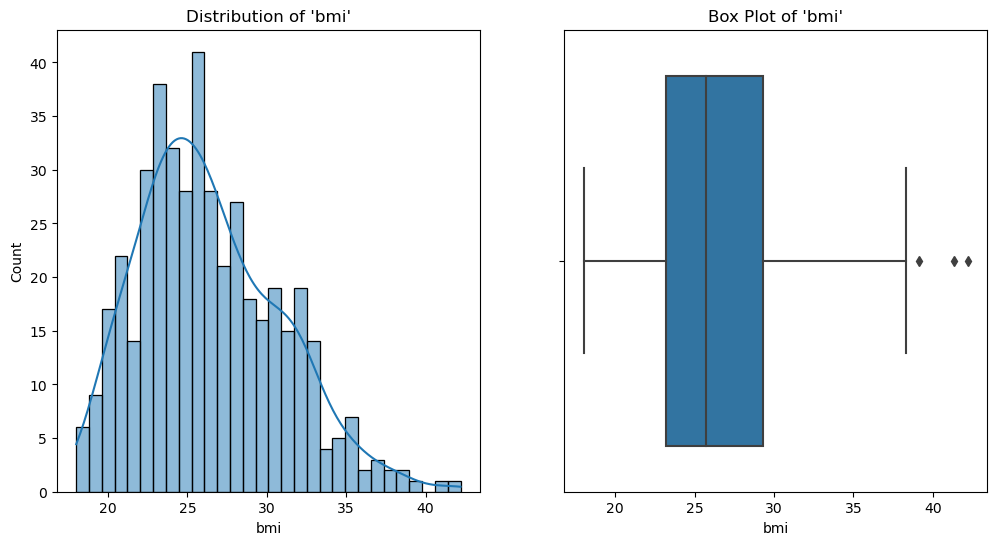

Kurtosis of 'bmi': 0.0804781286681302


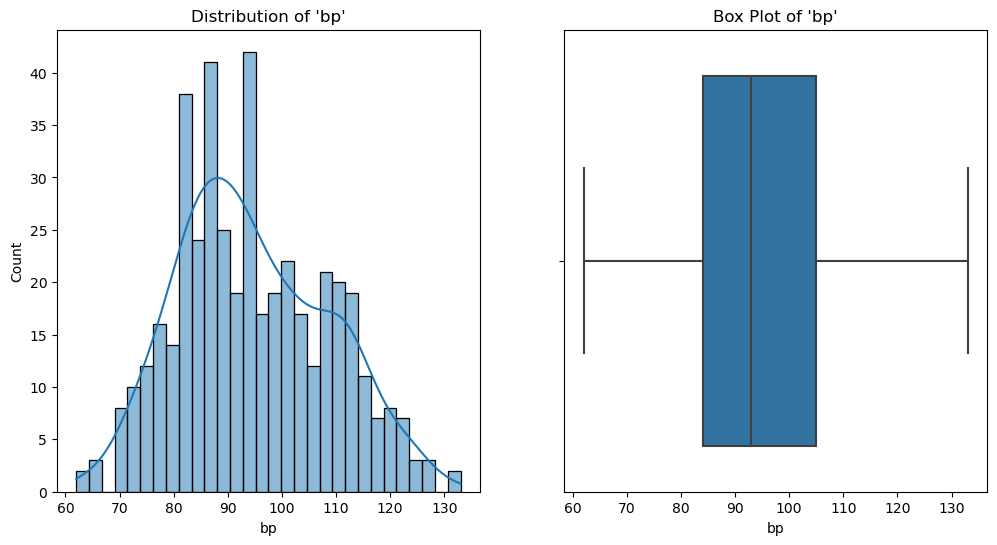

Kurtosis of 'bp': -0.540333229380495


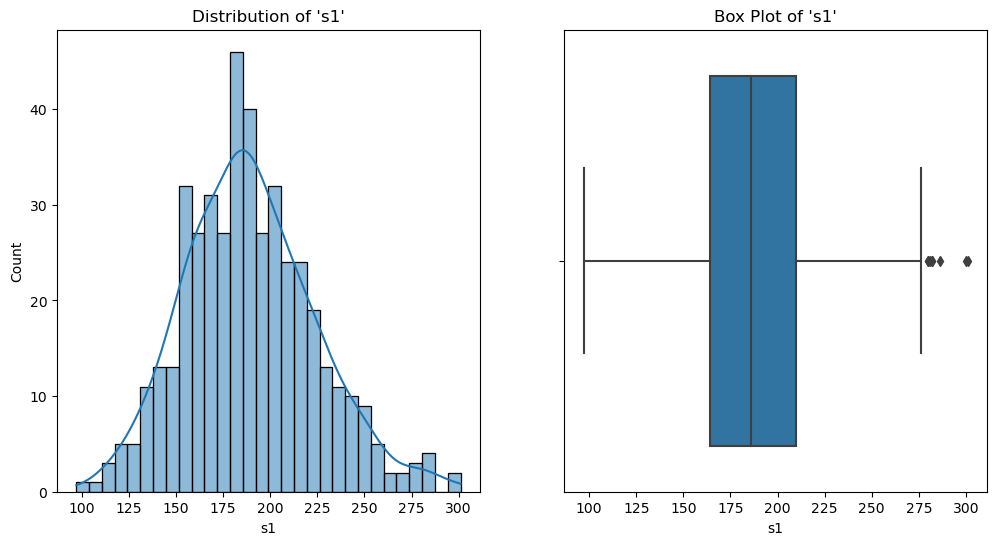

Kurtosis of 's1': 0.2167770625244292


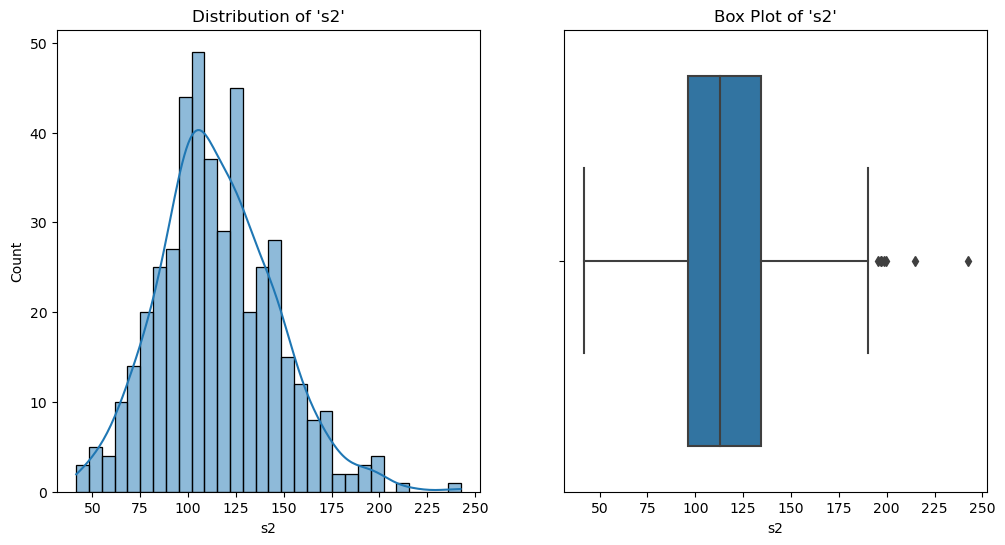

Kurtosis of 's2': 0.5810556912433786


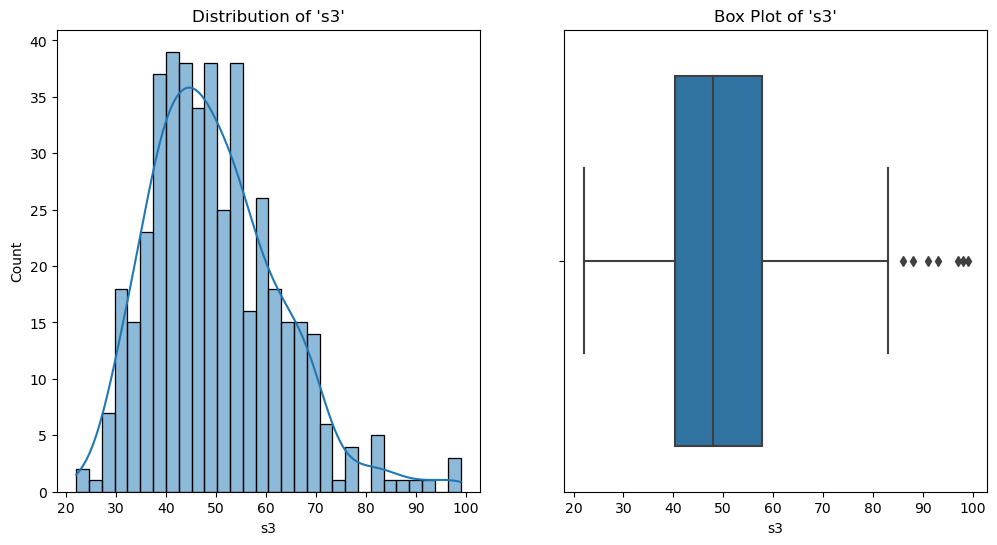

Kurtosis of 's3': 0.9568955290670438


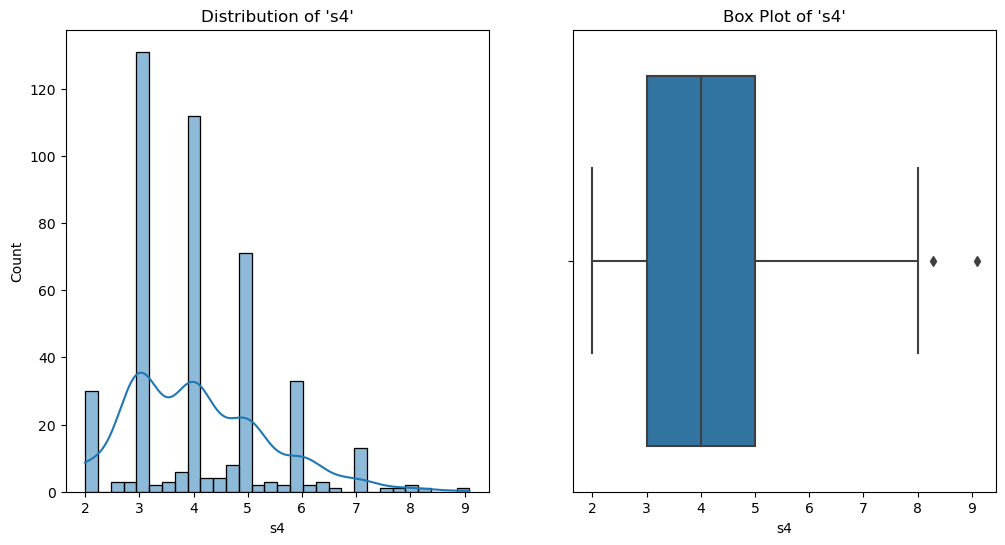

Kurtosis of 's4': 0.4258463830598682


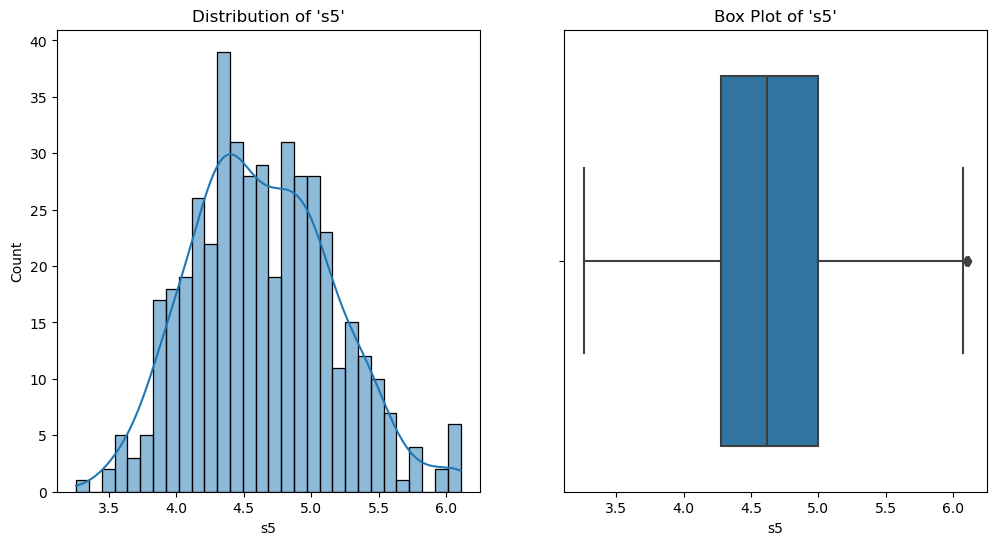

Kurtosis of 's5': -0.1463956623028877


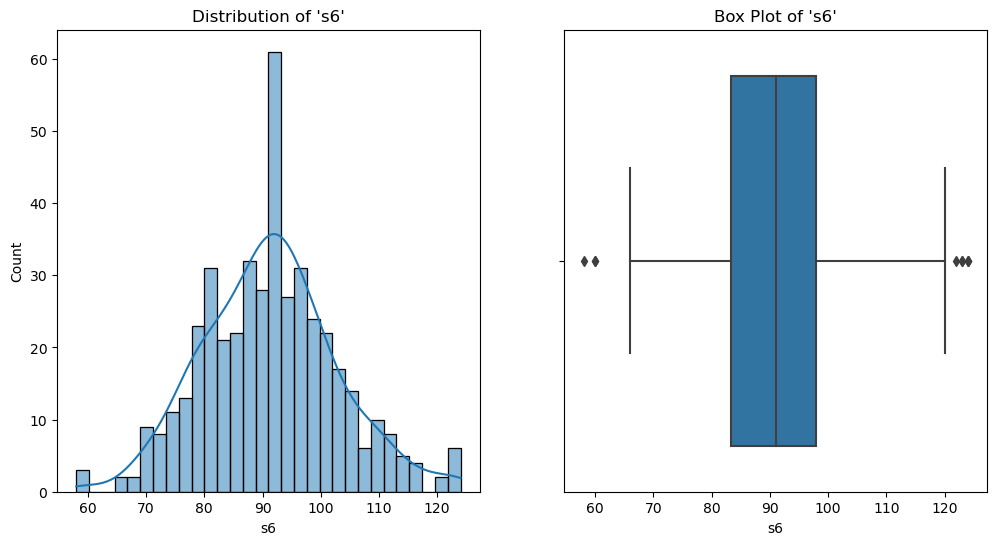

Kurtosis of 's6': 0.22070114138631514


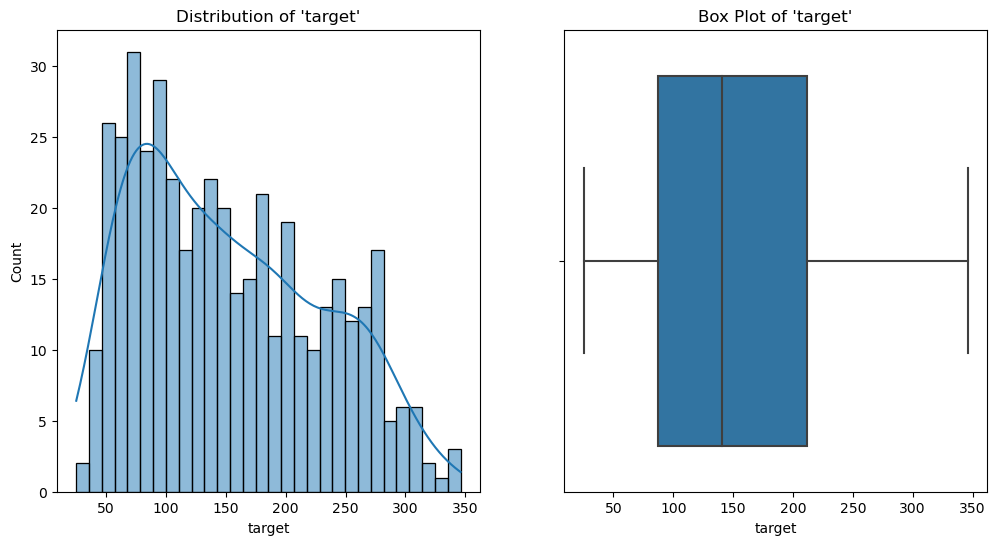

Kurtosis of 'target': -0.8866436055681386


In [8]:
# Visualizing Distributions
for column in diabetes_df.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(diabetes_df[column], bins=30, kde=True)
    plt.title(f"Distribution of '{column}'")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=diabetes_df[column])
    plt.title(f"Box Plot of '{column}'")
    plt.show()
    
    print(f"Kurtosis of '{column}': {kurtosis(diabetes_df[column])}")

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the entire DataFrame
diabetes_df_scaled = pd.DataFrame(scaler.fit_transform(diabetes_df), columns=diabetes_df.columns)
diabetes_df_scaled

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,-0.014719
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,-1.001659
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,-0.144580
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.699513
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,-0.222496
...,...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508,0.335904
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254,-0.625064
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674,-0.261454
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154,0.881318


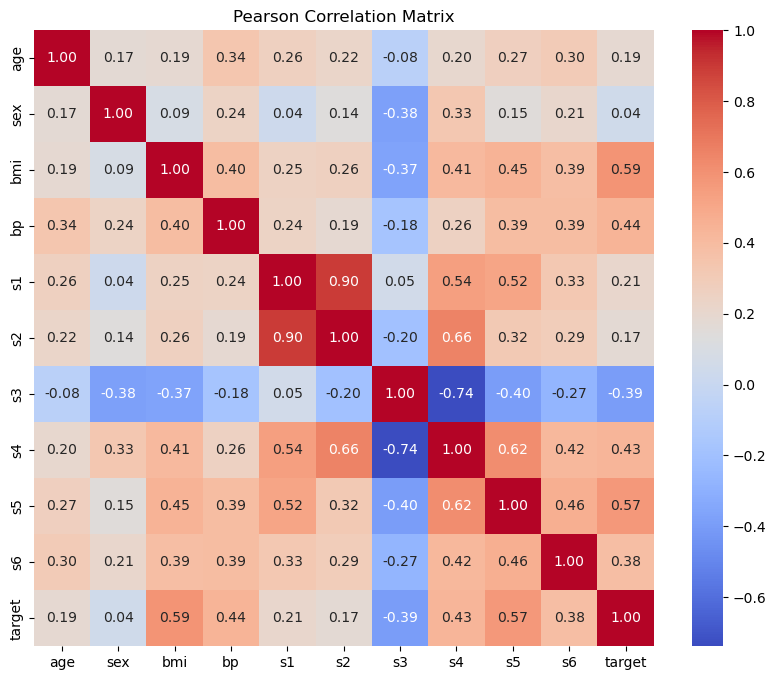

In [10]:
# Pearson Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix")
plt.show()

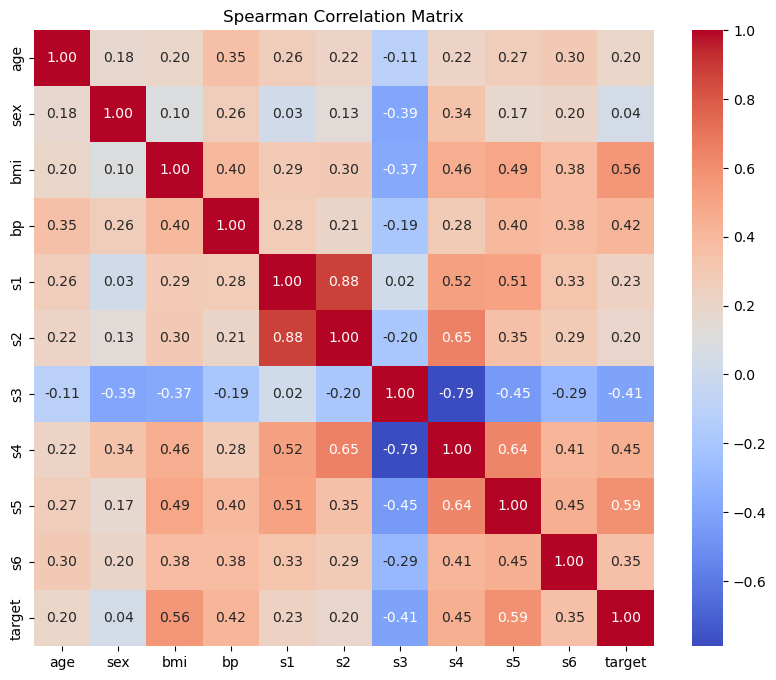

In [11]:
# Spearman Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df_scaled.corr(method='spearman'), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix")
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

target_x = diabetes_df_scaled[["age", "sex", "bmi", "s1", "s2", "s3", "s4", "s5"]]

vif_data = pd.DataFrame()
vif_data["Variable"] = target_x.columns
vif_data["VIF"] = [variance_inflation_factor(target_x.values, i) for i in range(target_x.shape[1])]

print(vif_data)

#NOTE: Generally, VIF > 5-10 indicates problematic multicollinearity
problematic = vif_data[vif_data["VIF"] > 5]
if not problematic.empty:
    print("\nVariables with potential multicollinearity issues:")
    print(problematic)
else:
    print("\nNo severe multicollinearity detected.")

  Variable        VIF
0      age   1.140681
1      sex   1.219007
2      bmi   1.366447
3       s1  59.118520
4       s2  39.165956
5       s3  15.378209
6       s4   8.788677
7       s5   9.943974

Variables with potential multicollinearity issues:
  Variable        VIF
3       s1  59.118520
4       s2  39.165956
5       s3  15.378209
6       s4   8.788677
7       s5   9.943974


In [13]:
target_x = diabetes_df_scaled[["age", "sex", "bmi", "s2", "s3", "s5"]]

vif_data = pd.DataFrame()
vif_data["Variable"] = target_x.columns
vif_data["VIF"] = [variance_inflation_factor(target_x.values, i) for i in range(target_x.shape[1])]

print(vif_data)

#NOTE: Generally, VIF > 5-10 indicates problematic multicollinearity
problematic = vif_data[vif_data["VIF"] > 5]
if not problematic.empty:
    print("\nVariables with potential multicollinearity issues:")
    print(problematic)
else:
    print("\nNo severe multicollinearity detected.")

  Variable       VIF
0      age  1.139495
1      sex  1.212350
2      bmi  1.355623
3       s2  1.165671
4       s3  1.458147
5       s5  1.474629

No severe multicollinearity detected.


- Preprocessing

In [14]:
X = target_x
y = diabetes_df_scaled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

## ii) Data modelling

- i) required - report the coefficients and p-values of OLS by manually implementing them

In [15]:
# Add a constant to the model (for the intercept)
X_train_const = sm.add_constant(X_train)

# Fit the model
ols_model = sm.OLS(y_train, X_train_const)
ols_fitted_model = ols_model.fit()

ols_fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     52.95
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.05e-46
Time:                        12:46:30   Log-Likelihood:                -383.57
No. Observations:                 353   AIC:                             781.1
Df Residuals:                     346   BIC:                             808.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0228      0.039      0.591      0.555      -0.053       0.099
age            0.0458      0.042      1.088      0.277      -0.037       0.129
sex           -0.0979      0.043     -2.278      0.023      -0.182      -0.013
bmi            0.3914      0.044      8.969      0.000       0.306       0.477
s2            -0.0959      0.041     -2.337      0.020      -0.177      -0.015
s3            -0.1514      0.046     -3.286      0.001      -0.242      -0.061
s5             0.3436      0.046      7.401      0.000       0.252       0.435
==============================================================================
Omnibus:                        2.482   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.250
Skew:                           0.111   Prob(JB):                        0.325
Kurtosis:                       2.678   Cond. No.                         2.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- ii) other models

In [16]:
# Models to evaluate
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Poly": make_pipeline(
        PolynomialFeatures(degree = 2, interaction_only=True), 
        LinearRegression()
    ),
    "SVR_Linear": SVR(kernel="linear", C=1.0, epsilon=0.1),
    "SVR_Poly": SVR(kernel="poly", C=1.0, epsilon=0.1),
    "SVR_RBF": SVR(kernel='rbf', C=1.0, epsilon=0.1) 
}


results = {}

# Initialize KFold
cv = KFold(n_splits = 5, shuffle = True, random_state = 2024)

# Iterate over each model to perform cross-validation
for name, model in models.items():
    # Perform cross-validation and calculate negative mean squared error
    cv_results = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
    
    # Calculate the mean of absolute values of the negative mean squared errors
    results[name] = np.mean(abs(cv_results["test_score"]))
    
results

{'Linear': 0.5353645547640808,
 'Ridge': 0.5352432371212694,
 'Lasso': 0.9880736844335791,
 'ElasticNet': 0.9163977925505213,
 'Poly': 0.5258027786309707,
 'SVR_Linear': 0.5422634272008263,
 'SVR_Poly': 0.7050607636595274,
 'SVR_RBF': 0.5516636118252103}

## iii) Model evaluation and validation

In [17]:
X_test_const = sm.add_constant(X_test)
y_pred_ols = ols_fitted_model.predict(X_test_const)
mse_ols = mean_squared_error(y_test, y_pred_ols)

mse_results = {
    "OLE": mse_ols
}

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_results[name] = mean_squared_error(y_test, y_pred)

In [19]:
mse_results

{'OLE': 0.5354003182588342,
 'Linear': 0.535400318258834,
 'Ridge': 0.5354355468718052,
 'Lasso': 1.0524708945166348,
 'ElasticNet': 0.9718579242010317,
 'Poly': 0.5304435159577399,
 'SVR_Linear': 0.5315290389853524,
 'SVR_Poly': 0.5614325717247752,
 'SVR_RBF': 0.6025626436236661}

## iv) Discuss the outcome.



## v) Other experiments (if any)

In [20]:
mlr2 = lm.IV2SLS(dependent=diabetes_df_scaled["target"], 
                 exog=diabetes_df_scaled[["age", "sex", "bmi"]], 
                 endog=diabetes_df_scaled[["s1", "s2"]], 
                 instruments=diabetes_df_scaled[["s3","s4", "bp"]]
                ).fit(cov_type="homoskedastic", debiased=True)

In [21]:
print(mlr2.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 31.2495
P-value: 0.0000
Distributed: F(2,435)


In [22]:
print(mlr2.sargan)

Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 41.7908
P-value: 0.0000
Distributed: chi2(1)
